In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import style
from matplotlib.legend_handler import HandlerBase
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder

from scipy import stats
from scipy.stats import norm, skew

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression,Lasso,BayesianRidge
from sklearn.svm import SVR
from xgboost import XGBRegressor as XGBR
from sklearn.metrics import mean_squared_log_error,mean_squared_error,r2_score,mean_absolute_error
from sklearn.decomposition import PCA

In [2]:
train_data_path = 'Datasets\\train.csv'
test_data_path = 'Datasets\\test.csv'

In [3]:
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

In [ ]:
print(train_data.shape)
print(test_data.shape)

In [4]:
df = train_data.copy()
print(df.shape)

(1460, 81)


In [5]:
#Keeping the id column as they need to exported with the data after preprocessing
train_id = train_data['Id']
test_id = test_data['Id']

In [ ]:
df.shape

In [6]:
#Dropping the 'Id' columns as the DataFrames are already indexed
df.drop(['Id'], axis=1, inplace=True)
test_data.drop(['Id'], axis=1, inplace=True)

In [ ]:
df.head(10)

In [ ]:
#missing value check
df.isnull().sum().sort_values(ascending=False)[:20]

In [7]:
cat_df = df.select_dtypes(include=[np.object])
cat_df.shape

(1460, 43)

In [ ]:
cat_df.head()

In [ ]:
# list of the categorical columns
cat_df.columns

In [8]:
num_df = df.select_dtypes(include=[np.number])
num_df.shape

(1460, 37)

In [ ]:
num_df.columns

In [9]:
#features with missing values
nan_df = df.loc[:, df.isnull().any()]
nan_df.columns

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [10]:
#merging train and test sets
all_data = pd.concat([train_data, test_data])
all_data.shape

(2919, 81)

In [11]:
all_data = all_data.reset_index(drop=True)

In [ ]:
all_data.head(10)

In [ ]:
df.shape

In [12]:
all_data.drop(['SalePrice'], axis=1, inplace=True)

In [ ]:
all_data.shape

In [ ]:
#analyzing target variable saleprice
sns.distplot(a=df['SalePrice'], color='#ff4125', axlabel=False).set_title('Sale Price')

In [ ]:
#Get also the qq-plot (the quantile-quantile plot)
#The quantile-quantile (q-q) plot is a graphical technique 
#for determining if two data sets come from populations with a common distribution.

fig = plt.figure()
res = stats.probplot(train_data['SalePrice'], plot=plt)
plt.show()

In [13]:
#taking log transofrm of the target saleprice
df['SalePrice'] = np.log1p(df['SalePrice'])

In [ ]:
df.shape

In [ ]:
sns.distplot(a=df['SalePrice'], color='#ff4125', axlabel=False).set_title('log(1+Sale Price)')

In [14]:
#Understanding the correlation here.
#which value effect the target the most needs to be known

cor_mat = df[:].corr()
cor_with_target = cor_mat.sort_values(['SalePrice'], ascending=False)

In [ ]:
print('Correlation with target SalePrice:')
cor_with_target.SalePrice

<AxesSubplot:>

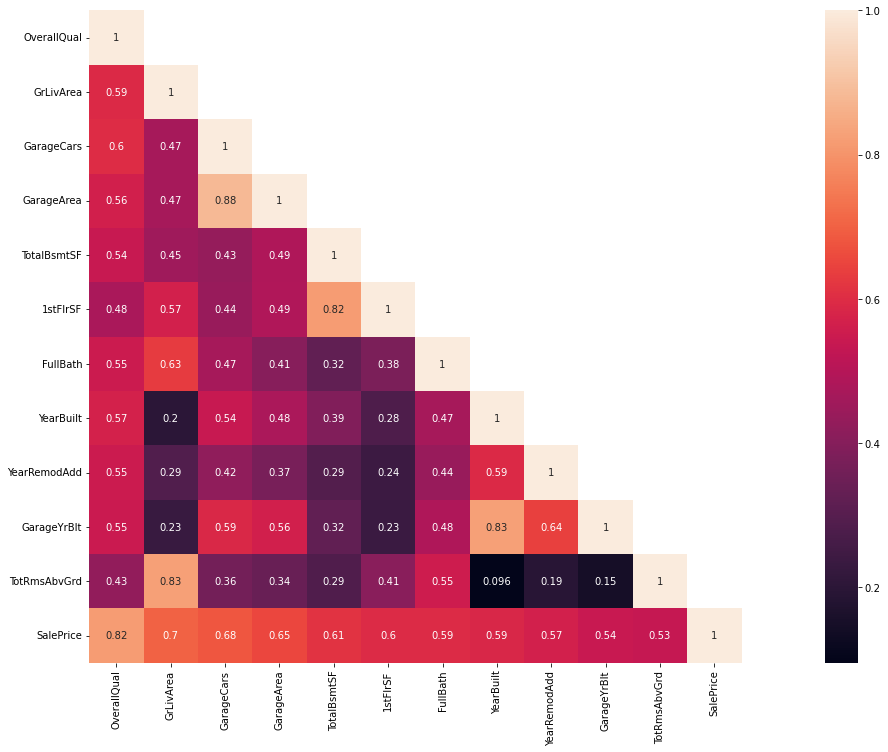

In [15]:
#using a corelation map to visualize features with high corelation.
#The columns were selected based on the correlation values

cor_mat= df[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath',
             'YearBuilt','YearRemodAdd','GarageYrBlt','TotRmsAbvGrd','SalePrice']].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(30, 12)
sns.heatmap(data=cor_mat, mask=mask, square=True, annot=True, cbar=True)

In [ ]:
#performing univariate analysis on features with high corelation with target variabale

def plot_numeric(feature):
    fig,axes = plt.subplots(1,2)
    sns.boxplot(data=df, x=feature, ax=axes[0])
    sns.distplot(a=df[feature], ax=axes[1], color='#ff4125')
    fig.set_size_inches(15,5)

In [ ]:
plot_numeric('GrLivArea')

In [ ]:
plot_numeric('GarageArea')

In [ ]:
plot_numeric('TotalBsmtSF')

In [ ]:
plot_numeric('1stFlrSF')

In [ ]:
def plot_categorical(feature):
    plt.figure(figsize=(15,5))
    sns.countplot(data=df, x=feature)
    ax=sns.countplot(data=df, x=feature)

In [ ]:
plot_categorical('OverallQual')

In [ ]:
plot_categorical('FullBath')

In [ ]:
plot_categorical('YearBuilt')

In [ ]:
plot_categorical('TotRmsAbvGrd')

In [ ]:
plot_categorical('GarageCars')

In [ ]:
#Features that are numerical here (GarageCars), are actually categorical and seems if they have been label encoded

In [ ]:
sns.factorplot(data=df, x='Neighborhood', kind='count', size=10, aspect=2.5)

In [ ]:
#bivariate analysis is now done plotting various categorical and numeric features against target 'SalePrice'

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x=df['GrLivArea'], y=df['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

In [ ]:
df.shape

In [16]:
#removing two outliers on the right
df = df.drop(df[(df['GrLivArea'] > 4000) & (df['SalePrice'] < 13)].index)

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x=df['GrLivArea'], y=df['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

In [ ]:
#garage area
fig, ax = plt.subplots()
ax.scatter(x=df['GarageArea'], y=df['SalePrice'])
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.show()

In [ ]:
#basement area
fig, ax = plt.subplots()
ax.scatter(x=df['TotalBsmtSF'], y=df['SalePrice'])
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.show()

In [ ]:
#1st floor area
fig, ax = plt.subplots()
ax.scatter(x=df['1stFlrSF'], y=df['SalePrice'])
plt.xlabel('1stFlrSF')
plt.ylabel('SalePrice')
plt.show()

In [ ]:
#overall qual
sns.factorplot(data=df, x='OverallQual', y='SalePrice', kind='box', size=5, aspect=2.5)

In [ ]:
#garage cars
sns.factorplot(data=df, x='GarageCars', y='SalePrice', kind='box', size=5, aspect=2.5)

In [ ]:
#no of rooms
sns.factorplot(data=df, x='TotRmsAbvGrd', y='SalePrice', kind='bar', size=5, aspect=2.5)

In [ ]:
#neighborhood
sns.factorplot(data=df, x='Neighborhood', y='SalePrice', kind='box', size=10, aspect=1.5)

In [ ]:
#sale condition
sns.factorplot(data=df, x='SaleCondition', y='SalePrice', kind='box', size=10, aspect=2.5)

In [17]:
nan_all_data = (all_data.isnull().sum())
nan_all_data = nan_all_data.drop(nan_all_data[nan_all_data == 0].index).sort_values(ascending=False)
miss_df = pd.DataFrame({'Missing Ratio' : nan_all_data})
print(miss_df)

              Missing Ratio
PoolQC                 2909
MiscFeature            2814
Alley                  2721
Fence                  2348
Id                     1459
FireplaceQu            1420
LotFrontage             486
GarageCond              159
GarageFinish            159
GarageQual              159
GarageYrBlt             159
GarageType              157
BsmtExposure             82
BsmtCond                 82
BsmtQual                 81
BsmtFinType2             80
BsmtFinType1             79
MasVnrType               24
MasVnrArea               23
MSZoning                  4
BsmtFullBath              2
BsmtHalfBath              2
Functional                2
Utilities                 2
GarageArea                1
GarageCars                1
TotalBsmtSF               1
KitchenQual               1
Electrical                1
BsmtUnfSF                 1
BsmtFinSF2                1
BsmtFinSF1                1
Exterior2nd               1
Exterior1st               1
SaleType            

In [18]:
#deleting features with high number of missing values
all_data.drop(['PoolQC','Alley','Fence','Id','MiscFeature'],axis=1,inplace=True)
all_data.columns
test_data.drop(['PoolQC','Alley','Fence','MiscFeature'],axis=1,inplace=True)
df.drop(['PoolQC','Alley','Fence','MiscFeature'],axis=1,inplace=True)

In [19]:
all_data.drop(['FireplaceQu'],axis=1,inplace=True)
test_data.drop(['FireplaceQu'],axis=1,inplace=True)
df.drop(['FireplaceQu'],axis=1,inplace=True)

In [ ]:
#Lot Frontage
print(df['LotFrontage'].dtype)
plt.scatter(x=np.log1p(df['LotFrontage']), y=df['SalePrice'])
cr = df.corr()
print(df['LotFrontage'].describe())
print('Correlation with Target :', cr.loc['LotFrontage', 'SalePrice'])

In [20]:
#Above analysis shows that there are some relation of LotFrontage with the sale price both by scatter plot and also by the
#correlation value. Therefore, instead of deleting lets fill the values with the mean

all_data['LotFrontage'].fillna(np.mean(all_data['LotFrontage']),inplace=True)
all_data['LotFrontage'].isnull().sum()

0

In [21]:
all_data['GarageYrBlt'].fillna(0, inplace=True)
print(all_data['GarageYrBlt'].isnull().sum())

all_data['GarageArea'].fillna(0, inplace=True)
print(all_data['GarageArea'].isnull().sum())

all_data['GarageCars'].fillna(0, inplace=True)
print(all_data['GarageCars'].isnull().sum())

all_data['GarageQual'].fillna('None', inplace=True)
print(all_data['GarageQual'].isnull().sum())

all_data['GarageFinish'].fillna('None', inplace=True)
print(all_data['GarageFinish'].isnull().sum())

all_data['GarageCond'].fillna('None', inplace=True)
print(all_data['GarageCond'].isnull().sum())

all_data['GarageType'].fillna('None', inplace=True)
print(all_data['GarageType'].isnull().sum())

0
0
0
0
0
0
0


In [22]:
#basement related features
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col].fillna(0,inplace=True)

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col].fillna('None',inplace=True)
print(all_data['TotalBsmtSF'].isnull().sum())

0


In [23]:
#MasVnrArea 0 and MasVnrType 'None'
all_data['MasVnrArea'].fillna(0,inplace=True)
all_data['MasVnrType'].fillna('None',inplace=True)

In [24]:
#MSZoning
# Here nan does not mean no so replacing with the most common one ie the mode
all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0],inplace=True)
print(all_data['MSZoning'].isnull().sum())

0


In [ ]:
#utilities
sns.factorplot(data=df, kind='box', x='Utilities', y='SalePrice', size=5, aspect=2.5)

In [25]:
#That training set has only 2 of the possible 4 categories (ALLPub and NoSeWa) while test set has other categories. 
#Hence it is of no use
all_data.drop(['Utilities'],axis=1,inplace=True)

In [26]:
#functional fill with mode
all_data['Functional'].fillna(all_data['Functional'].mode()[0],inplace=True)

In [ ]:
print(all_data['Functional'].isnull().sum())

In [27]:
# other remaining columns are all categorical, like kitchen qual etc.. and so filled with mode
for col in ['SaleType','KitchenQual','Exterior2nd','Exterior1st','Electrical']:
    all_data[col].fillna(all_data[col].mode()[0],inplace=True)
    print(all_data[col].isnull().sum())

0
0
0
0
0


In [28]:
#checking if any null values remaining
nan_all_data = (all_data.isnull().sum())
nan_all_data = nan_all_data.drop(nan_all_data[nan_all_data == 0].index).sort_values(ascending=False)
miss_df = pd.DataFrame({'Missing Ratio' : nan_all_data})
print(miss_df)

Empty DataFrame
Columns: [Missing Ratio]
Index: []


In [ ]:
miss_df

In [ ]:
all_data.shape

In [29]:
#log transform skewed numeric features
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
skewed_feats = train_data[numeric_feats].apply(lambda x: skew(x.dropna()))
skewed_feats = skewed_feats[skewed_feats > 0.50]
skewed_feats = skewed_feats.index
all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [30]:
#labelencode categorical features
for col in all_data.columns:
    if all_data[col].dtype == 'object':
        le = LabelEncoder()
        all_data[col] = le.fit_transform(all_data[col])

In [31]:
train = all_data[:1460]
test = all_data[1460:]

In [ ]:
test.shape

In [32]:
train['SalePrice'] = df['SalePrice']
train['SalePrice'].fillna(np.mean(train['SalePrice']),inplace=True)
train.shape

(1460, 74)

In [ ]:
print(train['SalePrice'].isnull().sum())

In [33]:
train.reset_index(inplace=True)
test.reset_index(inplace=True)

In [34]:
train = pd.concat([train_id, train], axis=1)
test = pd.concat([test_id, test], axis=1)

In [35]:
EXPORTED_TRAIN_DATA_PATH = 'Datasets\\preprocessed_train.csv'
EXPORTED_TEST_DATA_PATH = 'Datasets\\preprocessed_test.csv'

In [36]:
train.to_csv(EXPORTED_TRAIN_DATA_PATH, index=False)
test.to_csv(EXPORTED_TEST_DATA_PATH, index=False)

In [37]:
train_data_path = 'Datasets\\preprocessed_train.csv'
test_data_path = 'Datasets\\preprocessed_test.csv'

In [38]:
dataset = pd.read_csv(train_data_path)

In [39]:
dataset = dataset.drop(dataset[(dataset['GrLivArea'] > 8.4) & (dataset['SalePrice'] < 13)].index)

In [ ]:
dataset.shape

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x=dataset['GrLivArea'], y=dataset['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

In [40]:
label = df['SalePrice']

In [ ]:
label.size

In [41]:
dataset.drop(['SalePrice'],axis=1,inplace=True)

In [ ]:
dataset.shape

In [42]:
train_data, test_data, train_label, test_label = train_test_split(dataset, label, test_size=0.2)

In [43]:
#using standard scaler to normalize the training data
Scaler = StandardScaler()

#using principal component analysis to reduce the dimensionality of the features
pca = PCA(n_components=36)
train_data = Scaler.fit_transform(train_data)
test_data = Scaler.transform(test_data)

train_data = pca.fit_transform(train_data)
test_data = pca.transform(test_data)

In [ ]:
train_data.shape

In [44]:
def rmse(predictions, labels):
    return np.sqrt(mean_squared_error(predictions, labels))

In [45]:
#Creating a dictionary of models. These models are referenced with their default parameters

models = {
    'XGBRegressor': XGBR(),
    'LinearRegressor': LinearRegression(),
    'NaiveBayes': BayesianRidge(),
    'SVM': SVR(),
    'Lasso': Lasso(),
}

In [46]:
def predict_models(models, train_data, train_label, test_data, test_label):
    row = 0
    results = pd.DataFrame()
    
    for name,model in models.items():
        model.fit(train_data, train_label)
        score = model.score(train_data, train_label)
        predictions = model.predict(test_data)
        results.loc[row, 'Model'] = name
        results.loc[row, 'Score'] = score
        results.loc[row, 'Log-RMSE'] = rmse(predictions, test_label)
        results.loc[row, 'RMSE'] = rmse(np.expm1(predictions), np.expm1(test_label))
        
        row += 1
    return results

In [47]:
predict_models(models, train_data, train_label, test_data, test_label)

,Model,Score,Log-RMSE,RMSE
0,XGBRegressor,0.999971,0.174073,34138.471575
1,LinearRegressor,0.899975,0.149199,28981.359147
2,NaiveBayes,0.899950,0.149289,29059.566371
3,SVM,0.959162,0.174653,34968.599164
4,Lasso,0.189804,0.370685,77191.567832


In [ ]:
#GridSearch best parameters for XGBoost and Lasso

In [51]:
xgb1 = XGBR()
parameters = {
    'objective':['reg:linear'],
    'learning_rate':[.03, .05, .07],
    'max_depth':[2, 3, 5, 6, 7],
    'min_child_weight':[4],
    'silent':[1],
    'subsample':[i/10.0 for i in range(4,9)],
    'colsample_bytree':[i/10.0 for i in range(4,9)],
    'n_estimators':[500],
    'gamma':[i/10.0 for i in range(3,6)],
}

xgb_grid = GridSearchCV(xgb1, parameters, cv=2, n_jobs=5, verbose=True)
xgb_grid.fit(train_data, train_label)
prediction = xgb_grid.predict(test_data)
#rmse score with best parameters
print(rmse(prediction, test_label))
#best score achieved in GridSearch
print(xgb_grid.best_score_)
#best parameters found by gridsearch
print(xgb_grid.best_params_)

Fitting 2 folds for each of 1125 candidates, totalling 2250 fits
[16:22:57] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[16:22:57] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


0.1608499337590855
0.8557482048179502
{'colsample_bytree': 0.8, 'gamma': 0.3, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.5}


In [54]:
params_dict = {
        'alpha':[0.001, 0.005, 0.01,0.05,0.1,0.5,1]
      }
reg_lasso_cv = GridSearchCV(estimator=Lasso(), param_grid=params_dict, scoring='neg_mean_squared_error', cv=10)
reg_lasso_cv.fit(train_data,train_label)
prediction = reg_lasso_cv.predict(test_data)
print('rmse score: ')
print(rmse(prediction, test_label))
print('best score: ')
print(reg_lasso_cv.best_score_)
print('best parameters: ')
print(reg_lasso_cv.best_params_)

rmse score: 
0.1491320834957308
best score: 
-0.017353735410533346
best parameters: 
{'alpha': 0.001}


In [55]:
#kfold cross validation with xgb
kfold = KFold(n_splits = 10, shuffle=True)
kfold_auc = list()
for train_index, test_index in kfold.split(dataset):
    X_train, y_train = dataset.iloc[train_index], label.iloc[train_index]
    X_test, y_test = dataset.iloc[test_index], label.iloc[test_index]
    StdScaler = MinMaxScaler()
    X_train = StdScaler.fit_transform(X_train)
    X_test = StdScaler.transform(X_test)
    model = XGBR(colsample_bytree=0.4603,
                 gamma=0.0468,
                 learning_rate=0.05,
                 max_depth=3,
                 min_child_weight=1.7817,
                 n_estimators=2200,
                 reg_alpha=0.4640,
                 reg_lambda=0.8571,
                 subsample=0.5213,
                 silent=1,
                 random_state=7,
                 nthread=-1)
    model.fit(X_train, y_train)
    predict = model.predict(X_test)
    kfold_auc.append(mean_squared_error(predict, y_test))
print(np.mean(kfold_auc))

[17:50:30] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:50:34] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:50:38] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false